<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B06%5D%20-%20Deep%20Learning/LSTM_Basic_Step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Caso Práctico: LSTM Series Temporales
# Predicción de temperatura

---

## 📋 Información del Módulo

**Asignatura:** Data Analytics: Data Science, Machine Learning e Inteligencia Artificial  
**Máster:** FP en Business Analytics e Inteligencia Artificial  
**Profesores:** Álvaro López Barberá
**Ejemplo Práctico:**  Deep Learning (LSTM)

---

## 🎓 Objetivo

Predecir la tempratura de los próximos dias através de un dataset generado

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [29]:
# =====================
# 1. DATOS DE TEMPERATURA
# =====================
# Temperaturas diarias de 30 días
np.random.seed(42)
dias = np.arange(30)
# Simulamos patrón: tendencia + ciclo semanal + ruido
temperatura = 15 + 0.3 * dias + 3 * np.sin(dias / 3.5) + np.random.randn(30) * 0.5

print("📊 Temperaturas (primeros 10 días):")
print(temperatura[:10])
print(f"\nForma: {temperatura.shape}")

📊 Temperaturas (primeros 10 días):
[15.24835708 16.07639641 17.54634691 18.92944102 18.81239205 19.35264075
 20.55877555 20.21160965 19.43070389 19.59059057]

Forma: (30,)


In [30]:
# =====================
# 2. CREAR SECUENCIAS (ventanas deslizantes)
# =====================
def crear_secuencias(datos, longitud_secuencia):
    """
    Convierte serie temporal en secuencias para LSTM

    Ejemplo:
    datos = [15, 16, 18, 20, 22, 21, 19]
    longitud = 3

    X:                      y:
    [15, 16, 18]    →      20
    [16, 18, 20]    →      22
    [18, 20, 22]    →      21
    """
    X, y = [], []
    for i in range(len(datos) - longitud_secuencia):
        X.append(datos[i:i+longitud_secuencia])
        y.append(datos[i+longitud_secuencia])
    return np.array(X), np.array(y)

# Usar últimos 7 días para predecir el siguiente
longitud_secuencia = 7
X, y = crear_secuencias(temperatura, longitud_secuencia)

print(f"\n🔄 Secuencias creadas:")
print(f"X shape: {X.shape}")  # (23, 7)
print(f"y shape: {y.shape}")  # (23,)

# Ejemplo de una secuencia
print(f"\n📝 Ejemplo de secuencia:")
print(f"Input (7 días):  {X[0]}")
print(f"Output (día 8):  {y[0]:.2f}")


🔄 Secuencias creadas:
X shape: (23, 7)
y shape: (23,)

📝 Ejemplo de secuencia:
Input (7 días):  [15.24835708 16.07639641 17.54634691 18.92944102 18.81239205 19.35264075
 20.55877555]
Output (día 8):  20.21


In [31]:
# =====================
# 3. RESHAPE PARA LSTM
# =====================

#LSTM espera:  (samples, timesteps, features)
#              (n° secuencias, pasos temporales, variables)

#Tú tienes:    (23, 7)
#              (samples, timesteps) ← ¡Falta la dimensión de features!

# LSTM necesita formato: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
print(f"\n📐 Shape final para LSTM: {X.shape}")
print(f"   - Samples (secuencias): {X.shape[0]}")
print(f"   - Timesteps (días): {X.shape[1]}")
print(f"   - Features (temperatura): {X.shape[2]}")


📐 Shape final para LSTM: (23, 7, 1)
   - Samples (secuencias): 23
   - Timesteps (días): 7
   - Features (temperatura): 1


In [32]:
# =====================
# 4. NORMALIZAR
# =====================
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# normalizar, reshape
X_scaled = scaler_X.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

print(f"\n✅ Datos normalizados a rango [0, 1]")
print(f"Ejemplo normalizado: {X_scaled[0].flatten()[:3]}")


✅ Datos normalizados a rango [0, 1]
Ejemplo normalizado: [0.         0.07520611 0.20871336]


In [33]:
# =====================
# 5. TRAIN/TEST SPLIT
# =====================
# Importante: NO aleatorio, división temporal
split_idx = int(len(X_scaled) * 0.8)

X_train = X_scaled[:split_idx]
X_test = X_scaled[split_idx:]
y_train = y_scaled[:split_idx]
y_test = y_scaled[split_idx:]

print(f"\n📊 División train/test:")
print(f"Train: {X_train.shape[0]} secuencias")
print(f"Test:  {X_test.shape[0]} secuencias")


📊 División train/test:
Train: 18 secuencias
Test:  5 secuencias


In [34]:
# =====================
# ARQUITECTURA LSTM BÁSICA
# =====================
model = keras.Sequential([
    # Capa LSTM
    layers.LSTM(
        units=32,              # 32 neuronas (tamaño de memoria)
        activation='tanh',     # Función de activación interna ¿Por qué tanh?: Es el estándar en LSTM porque:Permite valores negativos y positivos
        input_shape=(7, 1)     # (timesteps, features) La red "mira" 7 pasos temporales anteriores y 1 predccion
    ),

    # Capa Dense para salida
    layers.Dense(1)            # 1 valor: temperatura predicha, Si fuera clasificación, usaríamos sigmoid o softmax
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("📋 Resumen del modelo:")
model.summary()

📋 Resumen del modelo:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

# Fórmula: 4 × (units² + units × input_size + units)
units = 32
input_size = 1

# Para cada puerta (forget, input, candidate, output):
params_per_gate = (units + input_size) × units + units
                = (32 + 1) × 32 + 32
                = 33 × 32 + 32
                = 1,056 + 32
                = 1,088

# Total: 4 puertas
total = 4 × 1,088 = 4,352 ✅

In [35]:
# =====================
# ENTRENAR MODELO
# =====================
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='loss',
    patience=20,
    restore_best_weights=True
)

print("🏃 Entrenando modelo LSTM...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=4,
    callbacks=[early_stop],
    verbose=0  # Sin output por epoch
)

print(f"✅ Entrenamiento completado en {len(history.history['loss'])} epochs")
print(f"   Loss final: {history.history['loss'][-1]:.6f}")

🏃 Entrenando modelo LSTM...
✅ Entrenamiento completado en 87 epochs
   Loss final: 0.005143


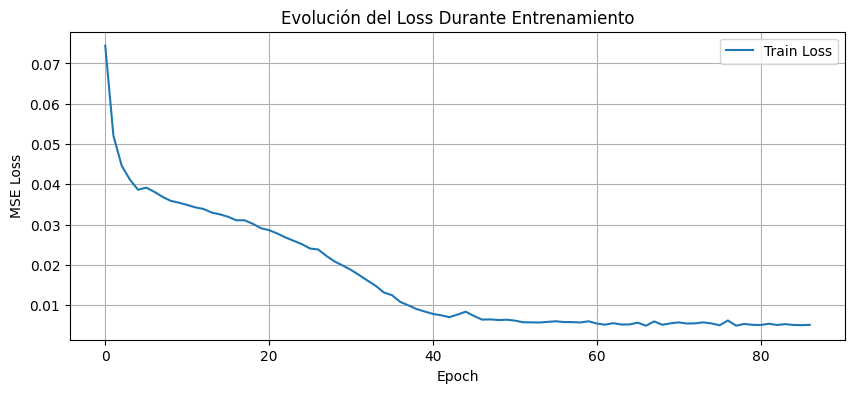

In [36]:
# =====================
# VISUALIZAR ENTRENAMIENTO
# =====================
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Evolución del Loss Durante Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# =====================
# HACER PREDICCIONES
# =====================
y_pred_scaled = model.predict(X_test, verbose=0)

# Desnormalizar
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"\n📊 RESULTADOS:")
print(f"   MAE:  {mae:.2f}°C")
print(f"   RMSE: {rmse:.2f}°C")


📊 RESULTADOS:
   MAE:  4.31°C
   RMSE: 4.48°C


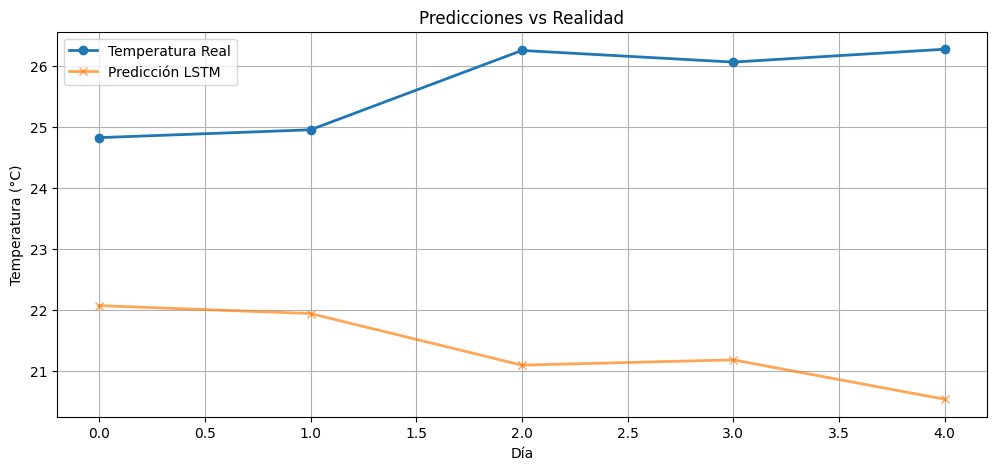

In [38]:
# =====================
# VISUALIZAR PREDICCIONES
# =====================
plt.figure(figsize=(12, 5))
plt.plot(y_test_original, label='Temperatura Real', marker='o', linewidth=2)
plt.plot(y_pred, label='Predicción LSTM', marker='x', linewidth=2, alpha=0.7)
plt.title('Predicciones vs Realidad')
plt.xlabel('Día')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# =====================
# EJEMPLO DETALLADO
# =====================
print(f"\n🔍 Primeras 5 predicciones:")
print(f"{'Real':>10} {'Predicho':>10} {'Error':>10}")
print("-" * 35)
for i in range(min(5, len(y_test_original))):
    real = y_test_original[i][0]
    pred = y_pred[i][0]
    error = abs(real - pred)
    print(f"{real:10.2f} {pred:10.2f} {error:10.2f}")


🔍 Primeras 5 predicciones:
      Real   Predicho      Error
-----------------------------------
     24.83      22.07       2.76
     24.96      21.94       3.01
     26.26      21.10       5.16
     26.07      21.18       4.89
     26.28      20.54       5.74


In [40]:
# =====================
# ARQUITECTURAS A COMPARAR
# =====================
arquitecturas = {
    'LSTM Simple (16)': keras.Sequential([
        layers.LSTM(16, input_shape=(7, 1)),
        layers.Dense(1)
    ]),

    'LSTM Simple (32)': keras.Sequential([
        layers.LSTM(32, input_shape=(7, 1)),
        layers.Dense(1)
    ]),

    'LSTM Simple (64)': keras.Sequential([
        layers.LSTM(64, input_shape=(7, 1)),
        layers.Dense(1)
    ]),

    'LSTM Apilada': keras.Sequential([
        layers.LSTM(32, return_sequences=True, input_shape=(7, 1)),
        layers.LSTM(16),
        layers.Dense(1)
    ]),

    'LSTM + Dropout': keras.Sequential([
        layers.LSTM(32, dropout=0.2, input_shape=(7, 1)),
        layers.Dense(1)
    ])
}

# Entrenar y evaluar cada arquitectura
resultados = {}

for nombre, modelo in arquitecturas.items():
    print(f"\n🔄 Entrenando: {nombre}")

    modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = modelo.fit(
        X_train, y_train,
        epochs=50,
        batch_size=4,
        verbose=0,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
    )

    # Predecir
    y_pred = modelo.predict(X_test, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test_orig = scaler_y.inverse_transform(y_test)

    # Métricas
    mae = mean_absolute_error(y_test_orig, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
    params = modelo.count_params()

    resultados[nombre] = {
        'MAE': mae,
        'RMSE': rmse,
        'Parámetros': params
    }


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔄 Entrenando: LSTM Simple (16)


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)



🔄 Entrenando: LSTM Simple (32)


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)



🔄 Entrenando: LSTM Simple (64)


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)



🔄 Entrenando: LSTM Apilada


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)



🔄 Entrenando: LSTM + Dropout


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


In [41]:
# =====================
# TABLA COMPARATIVA
# =====================
print("\n" + "="*70)
print(f"{'Arquitectura':<25} {'MAE (°C)':<12} {'RMSE (°C)':<12} {'Parámetros':<12}")
print("="*70)

for nombre, metricas in resultados.items():
    print(f"{nombre:<25} {metricas['MAE']:>10.2f} {metricas['RMSE']:>11.2f} {metricas['Parámetros']:>11,}")

print("="*70)


Arquitectura              MAE (°C)     RMSE (°C)    Parámetros  
LSTM Simple (16)                3.83        3.84       1,169
LSTM Simple (32)                5.84        6.03       4,385
LSTM Simple (64)                3.43        3.59      16,961
LSTM Apilada                    4.90        5.05       7,505
LSTM + Dropout                  5.44        5.51       4,385


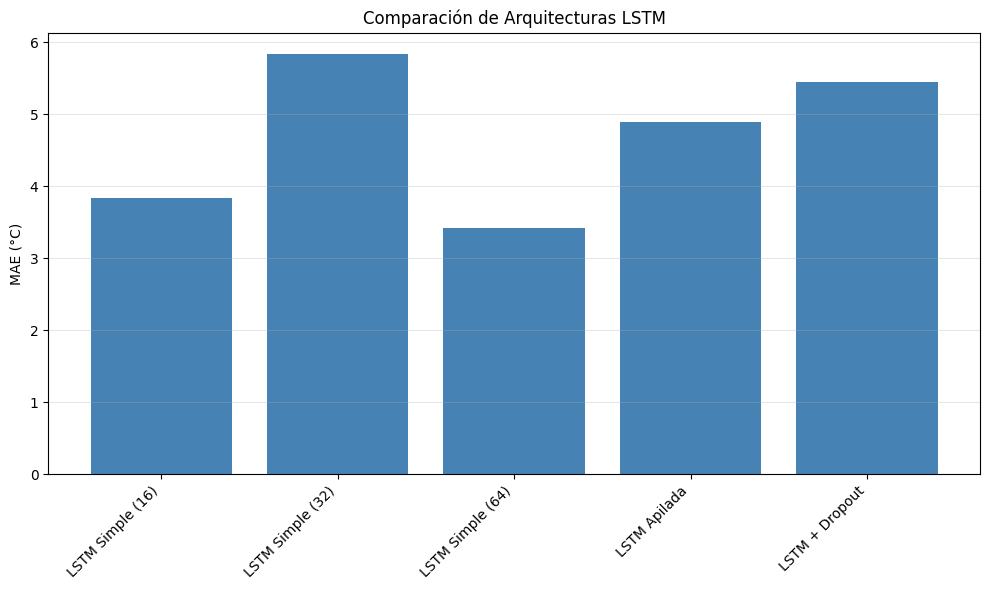

In [42]:
# =====================
# VISUALIZAR COMPARACIÓN
# =====================
nombres = list(resultados.keys())
maes = [resultados[n]['MAE'] for n in nombres]

plt.figure(figsize=(10, 6))
plt.bar(range(len(nombres)), maes, color='steelblue')
plt.xticks(range(len(nombres)), nombres, rotation=45, ha='right')
plt.ylabel('MAE (°C)')
plt.title('Comparación de Arquitecturas LSTM')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

🎓 Resumen
Este ejemplo muestra:

* ✅ Cómo preparar datos temporales para LSTM
* ✅ La arquitectura básica de un LSTM (32 units)
* ✅ Cómo entrenar y evaluar
* ✅ Cómo visualizar estados internos
* ✅ Comparación de arquitecturas

Recuerda: LSTM es poderoso para secuencias, pero requiere datos bien preparados y paciencia en el entrenamiento. ¡Experimenta con diferentes configuraciones!